# Correlación de Activos

##### Método de Pearson para calcular correlación de 2 activos

In [3]:
# primero se importan las indispensables librerias para la obtención de data desde Yahoo! Finance
import numpy as np
import pandas as pd
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [42]:
# definimos el periodo de estudio
start = dt.datetime(2003,2,18)
end = dt.datetime(2023,2,18)

# los activos a utilizar serán 2 ETFs, por un lado uno que replique al S&P500 y otro que represente los bonos a 20 años
assets = ['TLT', 'SPY']
df = pdr.get_data_yahoo(assets, start, end)
print(df)

[*********************100%***********************]  2 of 2 completed
                            Adj Close                   Close              \
                                  SPY         TLT         SPY         TLT   
Date                                                                        
2003-02-18 00:00:00-05:00   58.341286   45.512699   85.629997   87.919998   
2003-02-19 00:00:00-05:00   58.034718   45.823311   85.180000   88.519997   
2003-02-20 00:00:00-05:00   57.455597   45.978600   84.330002   88.820000   
2003-02-21 00:00:00-05:00   58.034718   45.709408   85.180000   88.300003   
2003-02-24 00:00:00-05:00   57.094486   45.926846   83.800003   88.720001   
...                               ...         ...         ...         ...   
2023-02-13 00:00:00-05:00  412.829987  104.260002  412.829987  104.260002   
2023-02-14 00:00:00-05:00  412.640015  104.019997  412.640015  104.019997   
2023-02-15 00:00:00-05:00  413.980011  103.050003  413.980011  103.050003   
2023-02

In [29]:
# calculamos el retorno logarítmico (una forma de calcular la variación porcentual tradicional)
adj_close = df['Adj Close']
log_returns = np.log(adj_close / adj_close.shift())
log_returns.head()

,SPY,TLT
Date,,
2003-02-18 00:00:00-05:00,NaN,NaN
2003-02-19 00:00:00-05:00,-0.005269,0.006801
2003-02-20 00:00:00-05:00,-0.010029,0.003383
2003-02-21 00:00:00-05:00,0.010029,-0.005871
2003-02-24 00:00:00-05:00,-0.016334,0.004746


## Correlation matrix

In [30]:
log_returns.corr()

,SPY,TLT
SPY,1.000000,-0.348214
TLT,-0.348214,1.000000


##### Y ahí lo tienen, 2 activos sin correlación alguna.

## Rolling correlation

In [38]:
# se asigna como base el SPY
# se calcula la correlación tomando en cuenta los últimos 63 periodos (1 trimestre), este valor no es una regla.
rolling_corr = log_returns['SPY'].rolling(window = 63).corr(log_returns['TLT'])

# los primeros 63 periodos quedarían sin valor (NaN), por ende, no los consideraremos
rolling_corr = rolling_corr.dropna()
rolling_corr.tail(10)

Date
2023-02-06 00:00:00-05:00    0.266581
2023-02-07 00:00:00-05:00    0.281358
2023-02-08 00:00:00-05:00    0.287519
2023-02-09 00:00:00-05:00    0.292676
2023-02-10 00:00:00-05:00    0.299385
2023-02-13 00:00:00-05:00    0.160065
2023-02-14 00:00:00-05:00    0.166243
2023-02-15 00:00:00-05:00    0.159657
2023-02-16 00:00:00-05:00    0.169159
2023-02-17 00:00:00-05:00    0.190713
dtype: float64

In [41]:
# principal información de los datos
rolling_corr.describe(percentiles = [0.68, 0.95])

count    4974.000000
mean       -0.306312
std         0.271914
min        -0.836529
50%        -0.340392
68%        -0.184666
95%         0.189204
max         0.429958
dtype: float64

##### Considerando estos 20 años de data, en el 95% de las veces la correlación fue de 18.9% o menos, al 17/2/23 la correlación fue del 19%, es decir existe una pequeña probabilidad (5%) que se mantenga en estos valores o sobrepase más allá de los 19.9%. Es mucho más probable que la correlación se estabilize, de hecho, en el 68% de los casos (primera desviación estándar) la correlación fue de -0.18% o menos.

<AxesSubplot:xlabel='Date'>

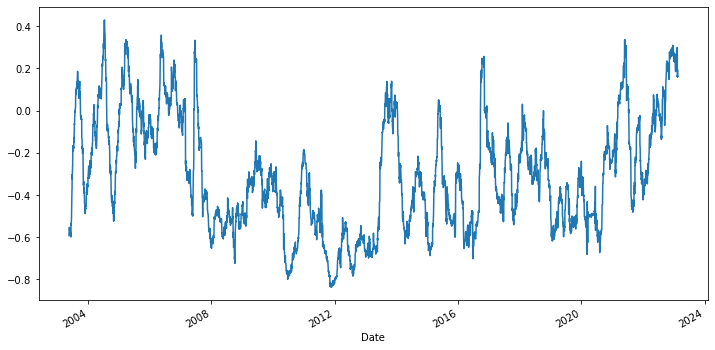

In [40]:
# graficamos de forma rápida
rolling_corr.plot(figsize = (12, 6))